<h1 align='center'>
    ED-7255
<h1>

<div align="center">
    <img src="ed7255.png" height=400px>
</div>

In [1]:
from FKM import *

### Definição da Tabela de Denavit Hartenberg:

In [2]:
ED7255 = Robot()

ED7255.addDHLine(theta1, 187, 0, rad(90))
ED7255.addDHLine(theta2+rad(90), 0, 230, 0)
ED7255.addDHLine(theta3, 0, 230, 0)
ED7255.addDHLine(theta4-rad(90), 0, 0, rad(-90))
ED7255.addDHLine(theta5, 124.5, 0, 0)

### Modelo Cinemático Direto:

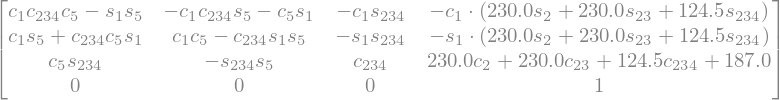

In [3]:
MCD = ED7255.HTM(0, 5, False)

abrev(MCD)

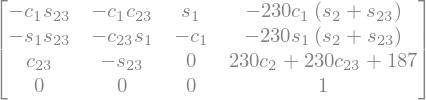

In [4]:
ED7255.HTM(0,3, True)

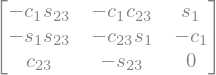

In [5]:
R30 = ED7255.HTM(0,3, True)[:3,:3]

R30

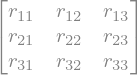

In [6]:
R = Matrix(np.array([
    [Symbol('r11'), Symbol('r12'), Symbol('r13')],
    [Symbol('r21'), Symbol('r22'), Symbol('r23')],
    [Symbol('r31'), Symbol('r32'), Symbol('r33')]
]))

R

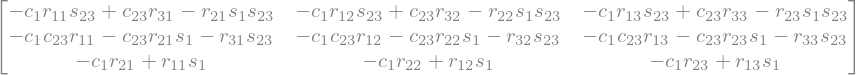

In [7]:
R30.T@R

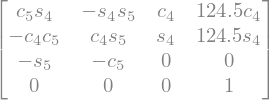

In [8]:
ED7255.HTM(3,5, True)

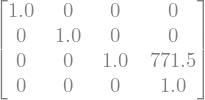

In [9]:
CALLSYS = [0, 0, 0, 0, 0]

ED7255.POSE(CALLSYS)

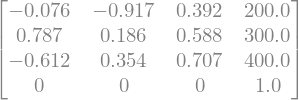

In [10]:
ED7255.POSE([rad(-123.6901), rad(114.6922), rad(-98.6523), rad(28.9602), rad(-150)])

### $$\text{Obtenção do Jacobiano de velocidades lineares } J_{v_i} = z_{i-1}^0 \times \left( o_n^0 - o_{i-1}^0 \right) \text{ :}$$

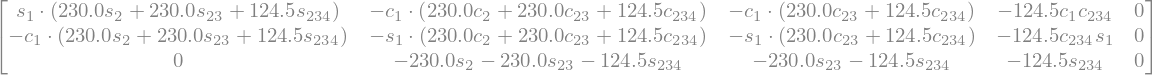

In [11]:
origins = MCD[0:3, 3]

jv = []
for i in thetas[:5]:
    jv.append(abrev(simplify(diff(origins, i))))

import numpy as np

Matrix(np.block(jv))

### $$\text{Obtenção de } Z_{i-1}^0 = R_{i-1}^0k \text{ :}$$

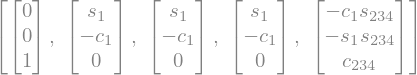

In [12]:
z = [Matrix([[0], [0], [1]])]
n = 5

for i in range(1, n):
    z.append(abrev(simplify(ED7255.HTM(0, i)[:3, 2])))

z

### $$\text{Obtenção do Jacobiano de velocidades angulares } J_{\omega_i} = z_{i-1}^0 \text{ :}$$

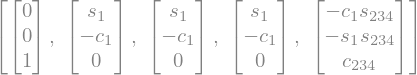

In [13]:
jw = []
for i in range(len(z)):
    if(ED7255.rotational[i]):
        jw.append(simplify(z[i]))
    else:
        jw.append(Matrix([[0], [0], [0]]))

jw

### $$\text{Obtenção do Jacobiano de velocidades completo, tal que } \xi = J(q)\dot{q} \text{ :}$$

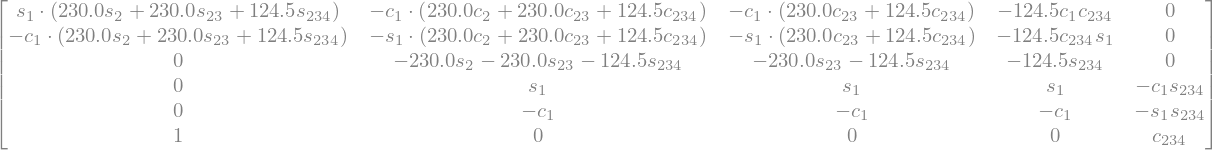

In [14]:
J = []
for k in range(3):
    J.append([])
    for i in range(5):
        J[k].append(simplify(jv[i][k]))
for k in range(3):
    J.append([])
    for i in range(5):
        J[k+3].append(simplify(jw[i][k]))

Matrix(J)